In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('../input/train.csv')

In [5]:
num_of_cols = len(list(df.columns))
num_of_cols

143

In [6]:
len(df)

9557

In [7]:
# columns with null values
df_isna = pd.DataFrame(df.isnull().sum())
df_isna.loc[(df_isna.loc[:, df_isna.dtypes != object] != 0).any(1)]

,0
v2a1,6860
v18q1,7342
rez_esc,7928
meaneduc,5
SQBmeaned,5


In [8]:
nan_cols = list(df_isna.loc[(df_isna.loc[:, df_isna.dtypes != object] != 0).any(1)].T.columns)
nan_cols

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [9]:
df[nan_cols].describe()

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
count,2.697000e+03,2215.000000,1629.000000,9552.000000,9552.000000
mean,1.652316e+05,1.404063,0.459791,9.231523,102.588867
std,1.504571e+05,0.763131,0.946550,4.167694,93.516890
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,8.000000e+04,1.000000,0.000000,6.000000,36.000000
50%,1.300000e+05,1.000000,0.000000,9.000000,81.000000
75%,2.000000e+05,2.000000,1.000000,11.600000,134.560010
max,2.353477e+06,6.000000,5.000000,37.000000,1369.000000


In [10]:
df.describe(include='all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_af66805cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,...,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.093858,0.080674,0.714555,0.285445,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.946550,1.772216,0.491107,0.267782,0.390756,0.092235,0.319788,0.113621,0.038248,0.038248,0.461361,0.416196,0.030675,0.032332,0.127120,0.248156,0.170391,0.131805,0.055942,...,4.167694,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,0.944507,0.819946,0.48578,0.300754,0.385573,0.129485,0.274750,0.302827,0.451251,0.155199,1.483249,0.492286,0.290036,0.241826,0.

In [11]:
df[nan_cols].sample(3000).describe()

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
count,842.000000,710.000000,527.000000,2997.000000,2997.000000
mean,163466.587886,1.404225,0.487666,9.169490,100.886252
std,136101.228155,0.786870,0.958918,4.100283,92.500506
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,80000.000000,1.000000,0.000000,6.000000,36.000000
50%,130000.000000,1.000000,0.000000,8.857142,78.448975
75%,200000.000000,2.000000,1.000000,11.400000,129.959990
max,1000000.000000,6.000000,5.000000,37.000000,1369.000000


**Multiple people can be part of a single household. Only predictions for heads of household are scored.**

In [12]:
df['parentesco1'].loc[df.parentesco1 == 1].describe()

count    2973.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: parentesco1, dtype: float64

In [13]:
(df['parentesco1'].loc[df.parentesco1 == 1].describe()['count']/len(df))*100

31.108088312231875

Nearly one-third (31%) of the ID's are heads of the household!

Need to build a dataframe of houses-- ie, all people belonging to same household in one row

Something like, ID's, house details, facilities, etc. All persons belonging to the same household will have the same Target!?***

*** to be verified!!

Apparently, it does ... as stated by "*idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.*"



In [14]:
# find number of households

df['idhogar'].describe()

count          9557
unique         2988
top       fd8a6d014
freq             13
Name: idhogar, dtype: object

There's a difference of 15 between unique households and number of persons who're head of the houses!

2988 - 2973

What could be the reason for this?



In [15]:
house_ids = list(df['idhogar'].unique())

In [16]:
df[['parentesco1','idhogar']].loc[df.parentesco1 == 1]

,parentesco1,idhogar
0,1,21eb7fcc1
1,1,0e5d7a658
2,1,2c7317ea8
5,1,2b58d945f
8,1,d6dae86b7
12,1,bb2094100
13,1,c51f9c774
18,1,6893e65ca
20,1,d29058053
21,1,ec0e8edce


In [17]:
hid_heads = df.groupby(['idhogar'])['parentesco1'].apply(lambda x: pd.unique(x.values.ravel()).tolist()).reset_index()
len(hid_heads)

2988

In [18]:
df_hid = pd.DataFrame(hid_heads, index=None, columns=['idhogar','parentesco1'])
df_hid.sample(5)

,idhogar,parentesco1
1858,a01f56571,"[1, 0]"
100,08039fb0e,"[0, 1]"
2063,b171f908d,"[0, 1]"
792,42881d49f,"[1, 0]"
1910,a3f712e18,"[0, 1]"


In [19]:
df_hid['parentesco1'] = df_hid['parentesco1'].apply(lambda x: ''.join(map(str, x)))

In [20]:
df_hid.sample(5)

,idhogar,parentesco1
2589,df2ff6b1b,10
1567,857198f22,01
1385,759d53825,01
102,088555bbe,1
2347,c9a19e08a,10


In [21]:
df_hid.loc[df_hid.parentesco1 == '0']

,idhogar,parentesco1
38,03c6bdf85,0
114,09b195e7a,0
230,1367ab31d,0
331,1bc617b23,0
645,374ca5a19,0
1143,61c10e099,0
1268,6b1b2405f,0
1613,896fe6d3e,0
1867,a0812ef17,0
2027,ad687ad89,0


In [22]:
# id's without head!
hid_wo_heads = list(df_hid['idhogar'].loc[df_hid.parentesco1 == '0'])
len(hid_wo_heads)

15

In [23]:
df_hwoh = df[df['idhogar'].isin(hid_wo_heads)]

In [24]:
df_hwoh[['idhogar', 'parentesco1','v2a1']]

,idhogar,parentesco1,v2a1
4935,09b195e7a,0,NaN
4975,896fe6d3e,0,NaN
5391,61c10e099,0,NaN
5396,374ca5a19,0,90000.0
6443,bfd5067c2,0,NaN
6444,bfd5067c2,0,NaN
7086,1367ab31d,0,NaN
7438,6b1b2405f,0,NaN
7439,6b1b2405f,0,NaN
7440,6b1b2405f,0,NaN


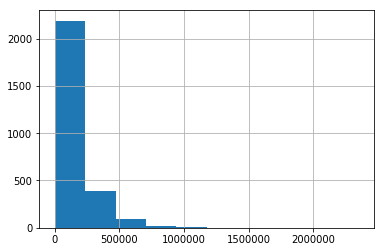

In [25]:
df['v2a1'].hist()

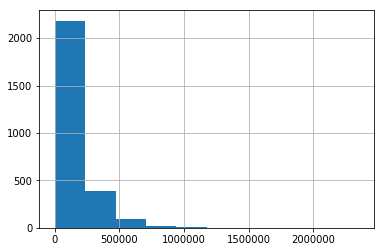

In [26]:
df['v2a1'].loc[-df['idhogar'].isin(hid_wo_heads)].hist()

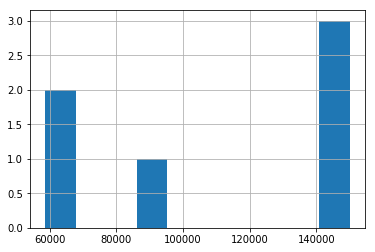

In [27]:
df_hwoh['v2a1'].hist()

In [28]:
len(df_hwoh)

23

In [29]:
# these 15 households (23 rows) doesn't have a head..
# we should exclude these from analysis and scoring perhaps...
df_hwoh['idhogar'].unique()

array(['09b195e7a', '896fe6d3e', '61c10e099', '374ca5a19', 'bfd5067c2',
       '1367ab31d', '6b1b2405f', 'f2bfa75c4', '03c6bdf85', 'ad687ad89',
       'b1f4d89d7', 'c0c8a5013', 'a0812ef17', 'd363d9183', '1bc617b23'],
      dtype=object)

In [30]:
print(df[['Id','v2a1','idhogar','parentesco1','Target']].loc[df.idhogar == '09b195e7a'])
print(df[['Id','v2a1','idhogar','parentesco1','Target']].loc[df.idhogar == 'f2bfa75c4'])


                Id  v2a1    idhogar  parentesco1  Target
4935  ID_717302050   NaN  09b195e7a            0       3
                Id      v2a1    idhogar  parentesco1  Target
7461  ID_1f91daf92  150000.0  f2bfa75c4            0       3
7462  ID_686d2639f  150000.0  f2bfa75c4            0       3
7463  ID_b84170356  150000.0  f2bfa75c4            0       3


In [31]:
# required dataframe - without households without a head!!
print("before removal: ", len(df))
df = df.loc[-df['idhogar'].isin(hid_wo_heads)]
print("after removal: ", len(df))

before removal:  9557
after removal:  9534


# Missing Values!!

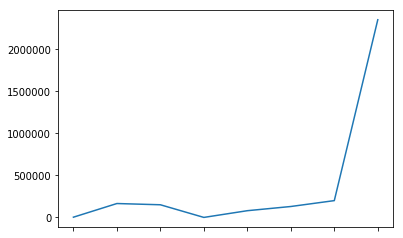

In [32]:
df['v2a1'].describe().plot()

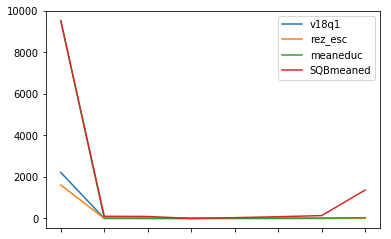

In [33]:
df[['v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']].describe().plot()

In [34]:
import gc

gc.collect()

1018

In [35]:
len(df['v2a1'].unique())

157

In [36]:
df['v2a1'].unique()

array([ 190000.,  135000.,      nan,  180000.,  130000.,  100000.,
         90000.,  215000.,  150000.,  120000.,   80000.,  168000.,
         40000.,  155000.,  200000.,  350000.,  270000.,  300000.,
        250000.,  260000.,  564834.,  175000.,   25310.,  400000.,
        450000.,  399378.,  119813.,  125518.,  125000.,   60000.,
         35000.,  160000.,  170000.,  500000.,  230000.,  185000.,
        220000.,  570540.,  342324.,       0.,  127000.,   52000.,
        240000.,  278000.,   70000.,  110000.,  100297.,  210000.,
        770229.,  285270.,  145000.,   96000.,  542013.,   65000.,
         85000.,  104000.,  275000.,  140000.,  280000.,  105661.,
         20000.,   16000.,   55000.,   30000.,  283000.,  245000.,
        191500.,  510000.,   36350.,   89000.,  600000.,   75000.,
         50000.,   84529.,  550000.,  132000.,  470000.,   27000.,
        176000.,  205000.,  380000.,  855810.,  427905.,  290975.,
        188000.,  118097.,  360000.,  325000., 1000000.,  7000

In [37]:
df['v2a1'].max()

2353477.0

### Outlier bro...

In [38]:
df[['v2a1','idhogar','parentesco1','Target']].loc[df.v2a1 > 1000000]

,v2a1,idhogar,parentesco1,Target
4441,2353477.0,563cc81b7,0,4
4442,2353477.0,563cc81b7,1,4


In [39]:
df[['v2a1','idhogar','parentesco1','Target']].loc[df.v2a1 >= 1000000]

,v2a1,idhogar,parentesco1,Target
2089,1000000.0,a9b2a46ba,1,4
4441,2353477.0,563cc81b7,0,4
4442,2353477.0,563cc81b7,1,4
5640,1000000.0,43a05e8bd,0,4
5641,1000000.0,43a05e8bd,1,4
5642,1000000.0,43a05e8bd,0,4
5643,1000000.0,43a05e8bd,0,4
5644,1000000.0,43a05e8bd,0,4
5645,1000000.0,43a05e8bd,0,4


In [40]:
# remove these two rows...
df[['v2a1','idhogar','parentesco1','Target']].loc[df.idhogar == '563cc81b7']

,v2a1,idhogar,parentesco1,Target
4441,2353477.0,563cc81b7,0,4
4442,2353477.0,563cc81b7,1,4


In [41]:
print("before removal: ", len(df))
df.drop(df[df.idhogar == '563cc81b7'].index, inplace=True)
print("after removal: ", len(df))

before removal:  9534
after removal:  9532


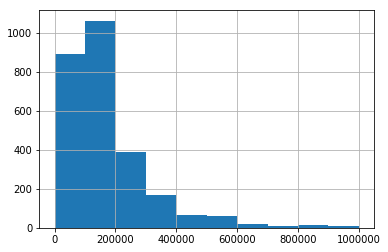

In [42]:
df['v2a1'].hist()

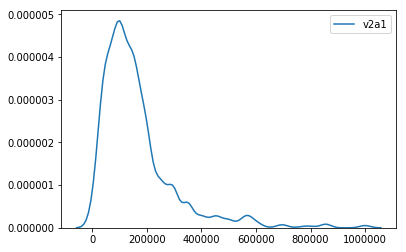

In [43]:
sns.kdeplot(df['v2a1'])

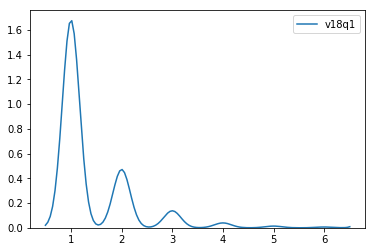

In [44]:
sns.kdeplot(df['v18q1'])

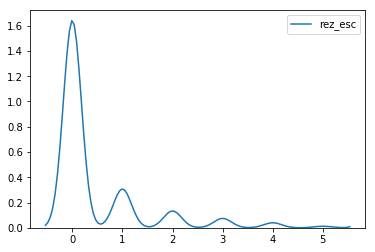

In [45]:
sns.kdeplot(df['rez_esc'])

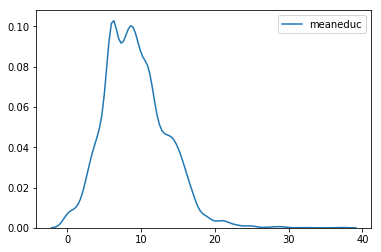

In [46]:
sns.kdeplot(df['meaneduc'])

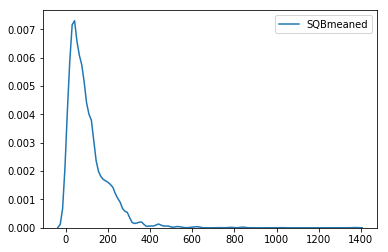

In [47]:
sns.kdeplot(df['SQBmeaned'])

All columns with NaN values follows nearly the same distribution! 
Let's wait to see the remaining column distributions before filling NaN values.

In [48]:
cols = list(df.columns)
cols

['Id',
 'v2a1',
 'hacdor',
 'rooms',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil

In [49]:
pd.options.display.max_columns = num_of_cols

In [50]:
df.sample(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
8183,ID_7822910f0,90000.0,0,4,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,12,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15701362c,1,2,0,3,.5,12,no,7.500000,0,0,0,0,0,0,1,0,0,2,1.500000,0,0,1,0,0,0,0,1,2,0,0,0,0,1,0,1,0,58,144,3364,9,144,1,2.250000,0.250000,56.25000,3364,3
4056,ID_1335572c3,0.0,0,6,0,1,1,0,NaN,0,3,3,2,2,4,2,5,7,7,7,0,NaN,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,f8c706c9d,3,4,0,7,.75,8,no,9.000000,1,0,0,0,0,0,0,0,0,4,1.750000,0,1,0,0,0,0,1,1,5,1,0,0,0,0,0,1,0,3,0,9,49,64,9,3.062500,0.562500,81.00000,9,2
8764,ID_7a7aecb18,NaN,0,6,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,8,NaN,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6b2b639a2,0,4,0,4,no,8,no,10.500000,0,0,0,1,0,0,0,0,0,3,1.333333,1,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,1,61,64,3721,16,64,0,1.777778,0.000000,110.25000,3721,4
161,ID_aaa431c01,NaN,0,7,0,1,1,1,2.0,0,2,2,1,4,5,1,6,7,7,7,12,NaN,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,28ec0c747,1,6,1,7,.40000001,no,5,7.500000,0,0,0,0,0,0,0,1,0,5,1.400000,1,0,0,0,0,0,0,1,4,1,0,0,0,0,0,1,0,21,144,441,49,0,1,1.960000,0.160000,56.25000,441,4
3583,ID_1446b9444,NaN,0,4,0,1,1,0,NaN,0,1,1,1,1,2,1,2,3,3,3,3,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,77ed86026,1,2,0,3,.5,11,no,11.000000,0,1,0,0,0,0,0,0,0,2,1.500000,1,0,0,0,0,0,1,1,2,1,0,0,0,0,0,1,0,9,9,81,9,121,1,2.250000,0.250000,121.00000,81,4
2652,ID_efe0c4a97,65000.0,0,3,0,1,1,0,NaN,2,1,3,0,1,1,2,2,4,4,4,6,NaN,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,791207bc5,2,2,0,4,yes,6,no,7.500000,0,0,1,0,0,0,0,0,0,2,2.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,33,36,1089,16,36,4,4.000000,1.000000,56.25000,1089,2
4570,ID_c65d8e90c,NaN,0,5,0,1,1,0,NaN,1,2,3,0,1,1,1,3,4,4,4,0,NaN,4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,85ca2cf83,2,2,0,4,yes,8,no,7.000000,1,0,0,0,0,0,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,1,0,3,0,9,16,64,4,4.000000,1.000000,49.00000,9,2
1545,ID_91882a3ad,NaN,0,6,0,1,1,1,1.0,0,1,1,0,3,3,0,4,4,4,4,11,NaN,4,1,0,0,0,0,0,

In [51]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

Only 3 types of data; no dates!?

In [52]:
col_types = {}

for col in cols:
    col_types[col] = df[col].dtype
    print(col, df[col].dtype)

Id object
v2a1 float64
hacdor int64
rooms int64
hacapo int64
v14a int64
refrig int64
v18q int64
v18q1 float64
r4h1 int64
r4h2 int64
r4h3 int64
r4m1 int64
r4m2 int64
r4m3 int64
r4t1 int64
r4t2 int64
r4t3 int64
tamhog int64
tamviv int64
escolari int64
rez_esc float64
hhsize int64
paredblolad int64
paredzocalo int64
paredpreb int64
pareddes int64
paredmad int64
paredzinc int64
paredfibras int64
paredother int64
pisomoscer int64
pisocemento int64
pisoother int64
pisonatur int64
pisonotiene int64
pisomadera int64
techozinc int64
techoentrepiso int64
techocane int64
techootro int64
cielorazo int64
abastaguadentro int64
abastaguafuera int64
abastaguano int64
public int64
planpri int64
noelec int64
coopele int64
sanitario1 int64
sanitario2 int64
sanitario3 int64
sanitario5 int64
sanitario6 int64
energcocinar1 int64
energcocinar2 int64
energcocinar3 int64
energcocinar4 int64
elimbasu1 int64
elimbasu2 int64
elimbasu3 int64
elimbasu4 int64
elimbasu5 int64
elimbasu6 int64
epared1 int64
epared2 int

In [53]:
import collections
from collections import OrderedDict

od = collections.OrderedDict(sorted(col_types.items()))

for k, v in od.items():
    print(k, v)        # sorted columns by name 

Id object
SQBage int64
SQBdependency float64
SQBedjefe int64
SQBescolari int64
SQBhogar_nin int64
SQBhogar_total int64
SQBmeaned float64
SQBovercrowding float64
Target int64
abastaguadentro int64
abastaguafuera int64
abastaguano int64
age int64
agesq int64
area1 int64
area2 int64
bedrooms int64
cielorazo int64
computer int64
coopele int64
dependency object
dis int64
edjefa object
edjefe object
elimbasu1 int64
elimbasu2 int64
elimbasu3 int64
elimbasu4 int64
elimbasu5 int64
elimbasu6 int64
energcocinar1 int64
energcocinar2 int64
energcocinar3 int64
energcocinar4 int64
epared1 int64
epared2 int64
epared3 int64
escolari int64
estadocivil1 int64
estadocivil2 int64
estadocivil3 int64
estadocivil4 int64
estadocivil5 int64
estadocivil6 int64
estadocivil7 int64
etecho1 int64
etecho2 int64
etecho3 int64
eviv1 int64
eviv2 int64
eviv3 int64
female int64
hacapo int64
hacdor int64
hhsize int64
hogar_adul int64
hogar_mayor int64
hogar_nin int64
hogar_total int64
idhogar object
instlevel1 int64
instle

In [54]:
# alternately we can use just sorted
sorted(col_types)

['Id',
 'SQBage',
 'SQBdependency',
 'SQBedjefe',
 'SQBescolari',
 'SQBhogar_nin',
 'SQBhogar_total',
 'SQBmeaned',
 'SQBovercrowding',
 'Target',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'age',
 'agesq',
 'area1',
 'area2',
 'bedrooms',
 'cielorazo',
 'computer',
 'coopele',
 'dependency',
 'dis',
 'edjefa',
 'edjefe',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'epared1',
 'epared2',
 'epared3',
 'escolari',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'estadocivil4',
 'estadocivil5',
 'estadocivil6',
 'estadocivil7',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'female',
 'hacapo',
 'hacdor',
 'hhsize',
 'hogar_adul',
 'hogar_mayor',
 'hogar_nin',
 'hogar_total',
 'idhogar',
 'instlevel1',
 'instlevel2',
 'instlevel3',
 'instlevel4',
 'instlevel5',
 'instlevel6',
 'instlevel7',
 'instlevel8',
 'instlevel9',
 'lugar1',
 'lugar2',

In [55]:
print(len(col_types))

for key in sorted(col_types):
    print(key, col_types[key])

143
Id object
SQBage int64
SQBdependency float64
SQBedjefe int64
SQBescolari int64
SQBhogar_nin int64
SQBhogar_total int64
SQBmeaned float64
SQBovercrowding float64
Target int64
abastaguadentro int64
abastaguafuera int64
abastaguano int64
age int64
agesq int64
area1 int64
area2 int64
bedrooms int64
cielorazo int64
computer int64
coopele int64
dependency object
dis int64
edjefa object
edjefe object
elimbasu1 int64
elimbasu2 int64
elimbasu3 int64
elimbasu4 int64
elimbasu5 int64
elimbasu6 int64
energcocinar1 int64
energcocinar2 int64
energcocinar3 int64
energcocinar4 int64
epared1 int64
epared2 int64
epared3 int64
escolari int64
estadocivil1 int64
estadocivil2 int64
estadocivil3 int64
estadocivil4 int64
estadocivil5 int64
estadocivil6 int64
estadocivil7 int64
etecho1 int64
etecho2 int64
etecho3 int64
eviv1 int64
eviv2 int64
eviv3 int64
female int64
hacapo int64
hacdor int64
hhsize int64
hogar_adul int64
hogar_mayor int64
hogar_nin int64
hogar_total int64
idhogar object
instlevel1 int64
in

In [56]:
cat_cols = []
num_cols = []
for col in cols:
    if df[col].dtype == 'O':
        cat_cols.append(col)
        print(col, df[col].dtype)
    else:
        num_cols.append(col)

Id object
idhogar object
dependency object
edjefe object
edjefa object


In [57]:
# categorical columns
cat_cols

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']

In [58]:
df[cat_cols].sample(10)

,Id,idhogar,dependency,edjefe,edjefa
5362,ID_5442b6d21,65d40cee2,2,no,4
5378,ID_1aede575d,058a60804,yes,12,no
4094,ID_a15014942,093f0c2c3,yes,17,no
5277,ID_78c2e2e46,42a42f94c,8,15,no
281,ID_f05dc2518,0473832dd,yes,9,no
5476,ID_7afb749fd,cce5bc0cf,no,no,no
7882,ID_6a8147c53,da1f78c73,.5,5,no
482,ID_d970ab4e5,15ca3021c,.5,19,no
8236,ID_7d612c7c2,a8fd701d8,.5,6,no
7765,ID_e0e27cabd,a8d97815a,yes,6,no


idhogar - this is a unique identifier for each household. This **can be used to create household-wide features**, etc. 

> All rows in a given household will have a matching value for this identifier.



In [59]:
len(num_cols)

138

In [60]:
# numerical columns
sorted(num_cols)

['SQBage',
 'SQBdependency',
 'SQBedjefe',
 'SQBescolari',
 'SQBhogar_nin',
 'SQBhogar_total',
 'SQBmeaned',
 'SQBovercrowding',
 'Target',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'age',
 'agesq',
 'area1',
 'area2',
 'bedrooms',
 'cielorazo',
 'computer',
 'coopele',
 'dis',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'epared1',
 'epared2',
 'epared3',
 'escolari',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'estadocivil4',
 'estadocivil5',
 'estadocivil6',
 'estadocivil7',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'female',
 'hacapo',
 'hacdor',
 'hhsize',
 'hogar_adul',
 'hogar_mayor',
 'hogar_nin',
 'hogar_total',
 'instlevel1',
 'instlevel2',
 'instlevel3',
 'instlevel4',
 'instlevel5',
 'instlevel6',
 'instlevel7',
 'instlevel8',
 'instlevel9',
 'lugar1',
 'lugar2',
 'lugar3',
 'lugar4',
 'lugar5',
 'lugar6',
 'male',
 '

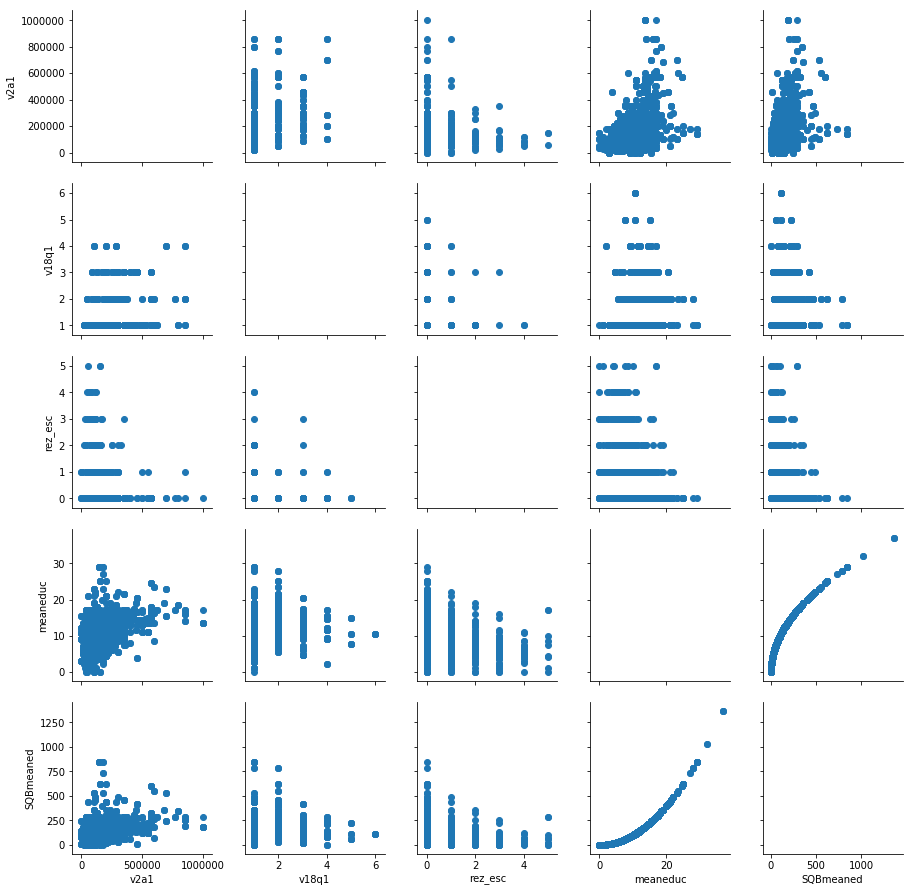

In [61]:
g = sns.PairGrid(df[nan_cols])
g = g.map_offdiag(plt.scatter)

* v2a1, Monthly rent payment
* hacdor, =1 Overcrowding by bedrooms
* rooms,  number of all rooms in the house
* hacapo, =1 Overcrowding by rooms
* v14a, =1 has bathroom in the household
* refrig, =1 if the household has refrigerator
* v18q, owns a tablet
* v18q1, number of tablets household owns
* r4h1, Males younger than 12 years of age
* r4h2, Males 12 years of age and older
* r4h3, Total males in the household
* r4m1, Females younger than 12 years of age
* r4m2, Females 12 years of age and older
* r4m3, Total females in the household
* r4t1, persons younger than 12 years of age
* r4t2, persons 12 years of age and older
* r4t3, Total persons in the household
* tamhog, size of the household
* tamviv, number of persons living in the household
* escolari, years of schooling
* rez_esc, Years behind in school
* hhsize, household size
* paredblolad, =1 if predominant material on the outside wall is block or brick
* paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
* paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
* pareddes, =1 if predominant material on the outside wall is waste material
* paredmad, =1 if predominant material on the outside wall is wood
* paredzinc, =1 if predominant material on the outside wall is zink
* paredfibras, =1 if predominant material on the outside wall is natural fibers
* paredother, =1 if predominant material on the outside wall is other
* pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
* pisocemento, =1 if predominant material on the floor is cement
* pisoother, =1 if predominant material on the floor is other
* pisonatur, =1 if predominant material on the floor is  natural material
* pisonotiene, =1 if no floor at the household
* pisomadera, =1 if predominant material on the floor is wood
* techozinc, =1 if predominant material on the roof is metal foil or zink
* techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
* techocane, =1 if predominant material on the roof is natural fibers
* techootro, =1 if predominant material on the roof is other
* cielorazo, =1 if the house has ceiling
* abastaguadentro, =1 if water provision inside the dwelling
* abastaguafuera, =1 if water provision outside the dwelling
* abastaguano, =1 if no water provision
* public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
* planpri, =1 electricity from private plant
* noelec, =1 no electricity in the dwelling
* coopele, =1 electricity from cooperative
* sanitario1, =1 no toilet in the dwelling
* sanitario2, =1 toilet connected to sewer or cesspool
* sanitario3, =1 toilet connected to  septic tank
* sanitario5, =1 toilet connected to black hole or letrine
* sanitario6, =1 toilet connected to other system
* energcocinar1, =1 no main source of energy used for cooking (no kitchen)
* energcocinar2, =1 main source of energy used for cooking electricity
* energcocinar3, =1 main source of energy used for cooking gas
* energcocinar4, =1 main source of energy used for cooking wood charcoal
* elimbasu1, =1 if rubbish disposal mainly by tanker truck
* elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
* elimbasu3, =1 if rubbish disposal mainly by burning
* elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
* elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
* elimbasu6, =1 if rubbish disposal mainly other
* epared1, =1 if walls are bad
* epared2, =1 if walls are regular
* epared3, =1 if walls are good
* etecho1, =1 if roof are bad
* etecho2, =1 if roof are regular
* etecho3, =1 if roof are good
* eviv1, =1 if floor are bad
* eviv2, =1 if floor are regular
* eviv3, =1 if floor are good
* dis, =1 if disable person
* male, =1 if male
* female, =1 if female
* estadocivil1, =1 if less than 10 years old
* estadocivil2, =1 if free or coupled uunion
* estadocivil3, =1 if married
* estadocivil4, =1 if divorced
* estadocivil5, =1 if separated
* estadocivil6, =1 if widow/er
* estadocivil7, =1 if single
* parentesco1, =1 if household head
* parentesco2, =1 if spouse/partner
* parentesco3, =1 if son/doughter
* parentesco4, =1 if stepson/doughter
* parentesco5, =1 if son/doughter in law
* parentesco6, =1 if grandson/doughter
* parentesco7, =1 if mother/father
* parentesco8, =1 if father/mother in law
* parentesco9, =1 if brother/sister
* parentesco10, =1 if brother/sister in law
* parentesco11, =1 if other family member
* parentesco12, =1 if other non family member
* idhogar, Household level identifier
* hogar_nin, Number of children 0 to 19 in household
* hogar_adul, Number of adults in household
* hogar_mayor, # of individuals 65+ in the household
* hogar_total, # of total individuals in the household
* dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
* edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
* edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
* meaneduc,average years of education for adults (18+)
* instlevel1, =1 no level of education
* instlevel2, =1 incomplete primary
* instlevel3, =1 complete primary
* instlevel4, =1 incomplete academic secondary level
* instlevel5, =1 complete academic secondary level
* instlevel6, =1 incomplete technical secondary level
* instlevel7, =1 complete technical secondary level
* instlevel8, =1 undergraduate and higher education
* instlevel9, =1 postgraduate higher education
* bedrooms, number of bedrooms
* overcrowding, # persons per room
* tipovivi1, =1 own and fully paid house
* tipovivi2, "=1 own,  paying in installments"
* tipovivi3, =1 rented
* tipovivi4, =1 precarious
* tipovivi5, "=1 other(assigned,  borrowed)"
* computer, =1 if the household has notebook or desktop computer
* television, =1 if the household has TV
* mobilephone, =1 if mobile phone
* qmobilephone, # of mobile phones
* lugar1, =1 region Central
* lugar2, =1 region Chorotega
* lugar3, =1 region PacÃƒÂ­fico central
* lugar4, =1 region Brunca
* lugar5, =1 region Huetar AtlÃƒÂ¡ntica
* lugar6, =1 region Huetar Norte
* area1, =1 zona urbana
* area2, =2 zona rural
* age, Age in years
* SQBescolari, escolari squared
* SQBage, age squared
* SQBhogar_total, hogar_total squared
* SQBedjefe, edjefe squared
* SQBhogar_nin, hogar_nin squared
* SQBovercrowding, overcrowding squared
* SQBdependency, dependency squared
* SQBmeaned, square of the mean years of education of adults (>=18) in the household
* agesq, Age squared

In [62]:
cols_electronics = ['refrig','mobilephone','television','qmobilephone','computer', 'v18q', 'v18q1', ]
cols_house_details = ['v2a1', 'area1', 'area2', 'bedrooms','rooms', 'cielorazo', 'v14a', 
                    'tamhog', 'hacdor', 'hacapo', 'r4t3', ]
cols_person_details = ['age', 'agesq', 'female', 'male',]
cols_SQ = ['SQBage', 'SQBdependency', 'SQBedjefe', 'SQBescolari', 'SQBhogar_nin', 
           'SQBhogar_total', 'SQBmeaned', 'SQBovercrowding',]
cols_water = ['abastaguadentro', 'abastaguafuera', 'abastaguano',]

cols_h = [ 'hhsize', 'hogar_adul', 'hogar_mayor', 'hogar_nin', 'hogar_total',]
cols_r = ['r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3',]
cols_tip = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5',]
cols_roof = ['techocane', 'techoentrepiso', 'techootro', 'techozinc',]
cols_floor = ['pisocemento', 'pisomadera', 'pisomoscer', 'pisonatur', 'pisonotiene', 'pisoother',]
cols_sanitary = [ 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6',]
cols_parents = [ 'parentesco1', 'parentesco10', 'parentesco11', 'parentesco12', 'parentesco2', 'parentesco3',
                'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9',]
cols_outside_wall = [ 'paredblolad', 'pareddes', 'paredfibras', 'paredmad', 'paredother', 
              'paredpreb', 'paredzinc', 'paredzocalo',]
cols_instlevel = [ 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6',
                  'instlevel7', 'instlevel8', 'instlevel9',]
cols_lugar = [ 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6',]
cols_estadoc = [ 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 
                'estadocivil5', 'estadocivil6', 'estadocivil7',]
cols_elim = ['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6',]
cols_energ = ['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4',]
cols_eviv = [ 'eviv1', 'eviv2', 'eviv3',]
cols_etech = [ 'etecho1', 'etecho2', 'etecho3',]
cols_pared = [ 'epared1', 'epared2', 'epared3',]
cols_unknown = [ 'dis', 'escolari', 'meaneduc', 
                'overcrowding', 'rez_esc', 'tamhog', 'tamviv', ]
cols_elec = ['coopele', 'noelec', 'planpri', 'public',]

total_features = cols_electronics+cols_house_details+cols_person_details+\
cols_SQ+cols_water+cols_h+cols_r+cols_tip+cols_roof+\
cols_floor+cols_sanitary+cols_parents+cols_outside_wall+\
cols_instlevel+cols_lugar+cols_estadoc+cols_elim+cols_energ+\
cols_eviv+cols_etech+cols_pared+cols_unknown+cols_elec

len(total_features)

139

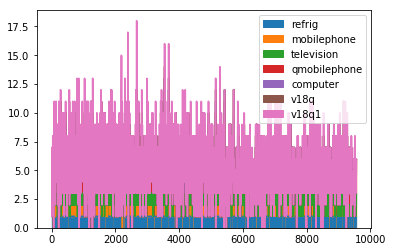

In [63]:
df[cols_electronics].plot.area()

In [64]:
df['Target'].unique()

array([4, 2, 3, 1])

In [65]:
cols_electronics_target = cols_electronics.append('Target')
df[cols_electronics].corr()

,refrig,mobilephone,television,qmobilephone,computer,v18q,v18q1,Target
refrig,1.000000,0.127337,0.081007,0.123072,0.060748,0.086159,-0.070318,0.126877
mobilephone,0.127337,1.000000,0.063276,0.302843,0.053814,0.086067,0.011255,0.106490
television,0.081007,0.063276,1.000000,0.218942,0.115416,0.127172,0.030691,0.157101
qmobilephone,0.123072,0.302843,0.218942,1.000000,0.170270,0.163614,0.218540,0.199958
computer,0.060748,0.053814,0.115416,0.170270,1.000000,0.304145,0.112456,0.183091
v18q,0.086159,0.086067,0.127172,0.163614,0.304145,1.000000,NaN,0.238865
v18q1,-0.070318,0.011255,0.030691,0.218540,0.112456,NaN,1.000000,-0.007334
Target,0.126877,0.106490,0.157101,0.199958,0.183091,0.238865,-0.007334,1.000000


In [66]:
#cols_electronics.remove('Target')
cols_electronics

['refrig',
 'mobilephone',
 'television',
 'qmobilephone',
 'computer',
 'v18q',
 'v18q1',
 'Target']

In [67]:
df.groupby('Target')[cols_electronics].sum()

,refrig,mobilephone,television,qmobilephone,computer,v18q,v18q1,Target
Target,,,,,,,,
1,670,712,90,1583,13,60,104.0,755
2,1483,1526,321,3934,25,125,159.0,3194
3,1144,1136,301,3280,57,143,183.0,3567
4,5831,5922,2007,18096,881,1887,2664.0,23964


In [68]:
df['tamhog'].unique()

array([ 1,  4,  2,  3,  5,  6, 10,  7,  9, 11,  8, 13, 12])

In [69]:
# high correlation between 
# no. of persons in the household,
# persons living in the household 
# and size of the household
# we can use any one...!!
df[['tamhog','r4t3', 'tamviv']].corr()

,tamhog,r4t3,tamviv
tamhog,1.000000,0.998405,0.943868
r4t3,0.998405,1.000000,0.945207
tamviv,0.943868,0.945207,1.000000


In [70]:
df[['r4t3','tamviv']].corr()

,r4t3,tamviv
r4t3,1.000000,0.945207
tamviv,0.945207,1.000000


In [71]:
total_features.remove('r4t3')
total_features.remove('tamhog')
total_features.remove('tamviv')

len(total_features)

136

In [72]:
df['escolari'].unique()

array([10, 12, 11,  9,  2,  0,  3,  4, 15, 16,  6, 13,  8,  1, 17,  7, 14,
        5, 21, 19, 18, 20])

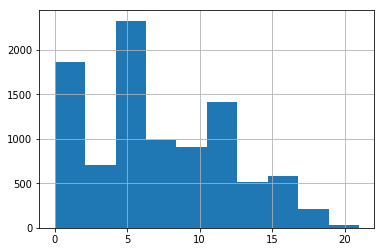

In [73]:
df['escolari'].hist()

In [74]:
df['escolari'].describe()

count    9532.000000
mean        7.202371
std         4.731203
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        21.000000
Name: escolari, dtype: float64

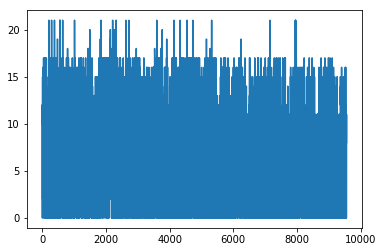

In [75]:
df['escolari'].plot.line()

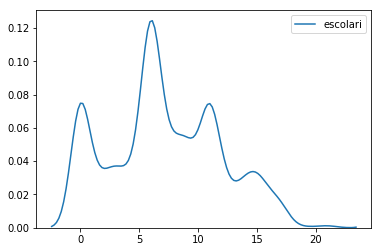

In [76]:
sns.kdeplot(df.escolari)

In [77]:
correlations = df[num_cols].corr()

In [78]:
import numpy as np

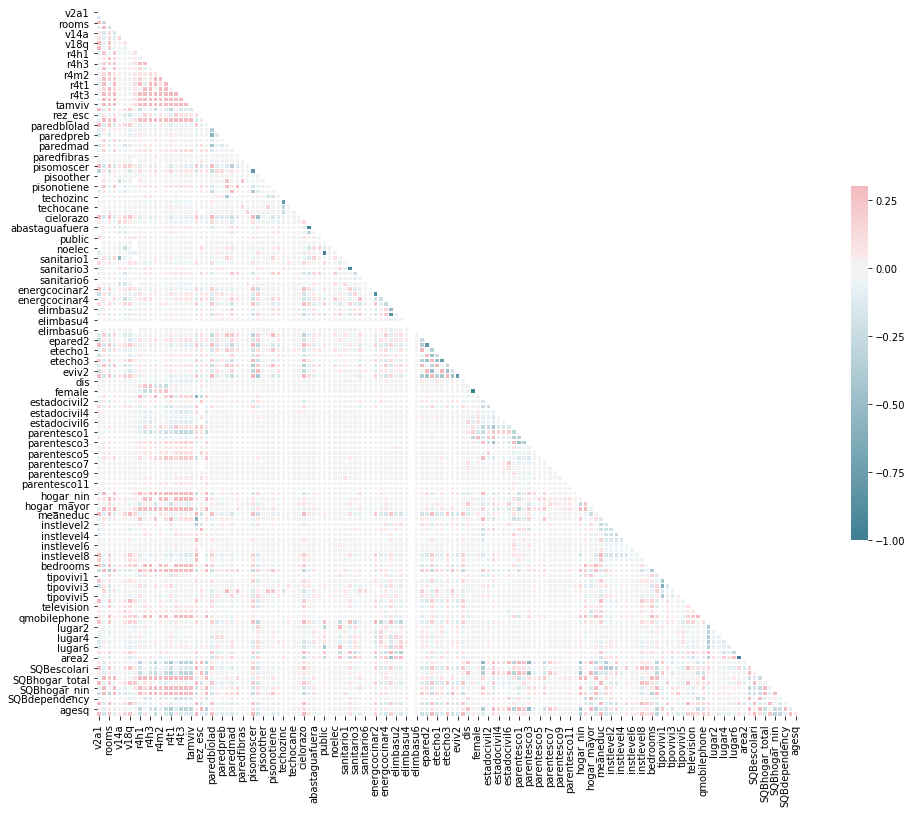

In [79]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(17, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [80]:
# difficult to look into the above one
es_corr = df[num_cols].corrwith(df.escolari, axis=0)

In [81]:
for x,y in zip(num_cols, list(es_corr)):
    if (y >= 0.75) or (y < -0.6):
        print(x,y)

escolari 0.9999999999999998
instlevel1 -0.6012089922946083
SQBescolari 0.943318394278482


In [82]:
# escolari is highly correlated to SQBescolari
# let's see if SQBescolari is correlated to cols_house_details

In [83]:
sqbes_corr = df[num_cols].corrwith(df.SQBescolari, axis=0)

In [84]:
for x,y in zip(num_cols, list(sqbes_corr)):
    if (y >= 0.5) or (y < -0.6):
        print(x,y)

escolari 0.943318394278482
meaneduc 0.5605369205712253
instlevel8 0.7106529003869068
SQBescolari 0.9999999999999998
SQBmeaned 0.5105218658007888


In [85]:
total_features.remove('escolari')
len(total_features)

135

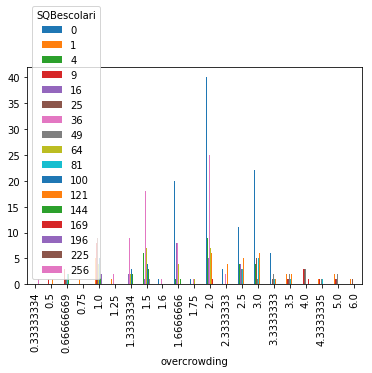

In [86]:
df.loc[df.Target == 1].groupby('overcrowding').SQBescolari.value_counts().unstack().plot.bar()

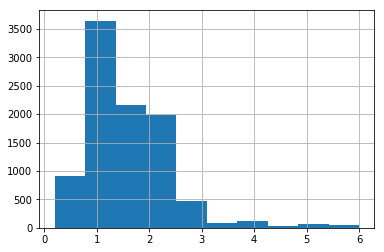

In [87]:
df['overcrowding'].hist()

In [88]:
df['overcrowding'].unique()

array([1.        , 0.5       , 1.3333334 , 4.        , 2.        ,
       3.        , 1.5       , 1.6666666 , 0.33333334, 2.5       ,
       0.75      , 0.25      , 0.66666669, 5.        , 1.4       ,
       3.5       , 0.40000001, 1.25      , 1.8333334 , 0.80000001,
       1.2       , 1.75      , 2.3333333 , 0.60000002, 1.6       ,
       2.6666667 , 0.2       , 6.        , 3.3333333 , 0.83333331,
       4.3333335 , 3.6666667 , 5.5       , 2.2       , 2.25      ,
       1.1666666 , 4.5       , 1.8       ])

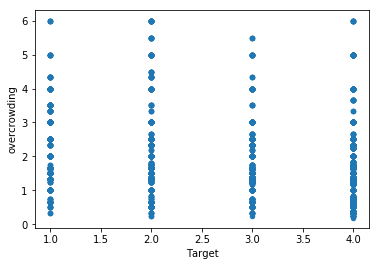

In [89]:
df.plot.scatter(x='Target', y='overcrowding')

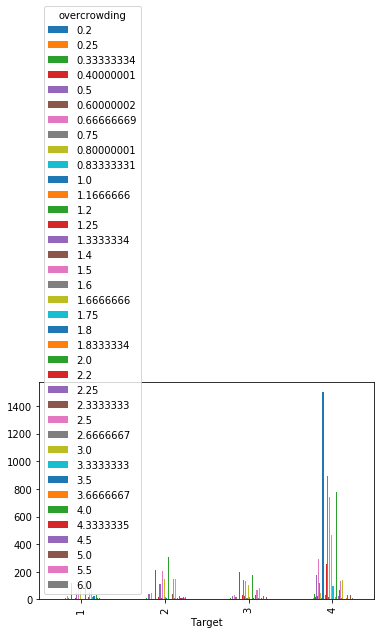

In [90]:
df.groupby('Target').overcrowding.value_counts().unstack().plot.bar()

In [91]:
df['Target'].describe()

count    9532.000000
mean        3.302560
std         1.010667
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64

Target - the target is an ordinal variable indicating groups of income levels.
1. extreme poverty
1. moderate poverty
1. vulnerable households
1. non vulnerable households 

In [92]:
df['Target'].unique()

array([4, 2, 3, 1])

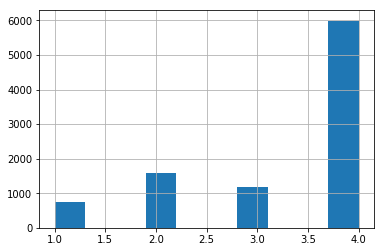

In [93]:
df['Target'].hist()

---

In [94]:
nan_cols

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [95]:
# filling missing values

df[nan_cols].corr()

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
v2a1,1.000000,0.302292,-0.088257,0.447639,0.421926
v18q1,0.302292,1.000000,-0.052453,0.125435,0.115522
rez_esc,-0.088257,-0.052453,1.000000,-0.218705,-0.176264
meaneduc,0.447639,0.125435,-0.218705,1.000000,0.947946
SQBmeaned,0.421926,0.115522,-0.176264,0.947946,1.000000


In [96]:
for col in nan_cols:
    if col != 'v2a1':
        print(col, df[col].unique())

v18q1 [nan  1.  2.  3.  4.  5.  6.]
rez_esc [nan  1.  0.  3.  2.  4.  5.]
meaneduc [10.         12.         11.         23.          9.5        17.
 13.5        10.333333   15.          6.6666665   5.25        7.
 15.5         9.         13.         14.         16.5        14.333333
  9.333333    6.5         6.          8.          4.         11.5
 12.75       12.5         5.5         7.7777777   7.5         4.5
 11.333333    6.25       16.         19.          5.         12.25
  5.6666665   9.666667    2.         10.5        11.4        11.75
 13.666667    2.5         8.666667    7.75       18.         14.5
  8.5         1.          6.2857141  10.25        3.5         4.3333335
  8.333333   14.2        18.5        21.          4.6666665  17.5
  9.25        9.75        7.6666665   8.6000004  15.666667   11.666667
  5.3333335   6.75       10.6         3.         20.         12.666667
 11.25        7.25        6.3333335   3.6666667  12.333333    8.75
 14.666667   17.333334   21.5        

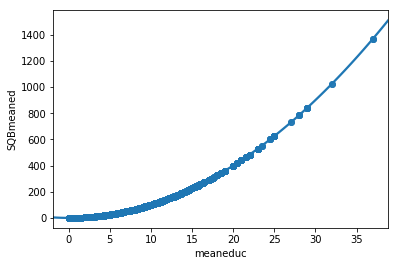

In [97]:
# there's a clear quadratic relation between meaneduc and SQBmeaned
# hence, we can ignore either one of these..say, meaneduc
sns.regplot(df['meaneduc'],df['SQBmeaned'], order=2)

In [98]:
# filling na values in meaneduc and SQBmeaned
df['meaneduc'].fillna(0, inplace=True)
df['SQBmeaned'].fillna(0, inplace=True)

In [99]:
total_features.remove('meaneduc')

total_features

['refrig',
 'mobilephone',
 'television',
 'qmobilephone',
 'computer',
 'v18q',
 'v18q1',
 'v2a1',
 'area1',
 'area2',
 'bedrooms',
 'rooms',
 'cielorazo',
 'v14a',
 'hacdor',
 'hacapo',
 'age',
 'agesq',
 'female',
 'male',
 'SQBage',
 'SQBdependency',
 'SQBedjefe',
 'SQBescolari',
 'SQBhogar_nin',
 'SQBhogar_total',
 'SQBmeaned',
 'SQBovercrowding',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'hhsize',
 'hogar_adul',
 'hogar_mayor',
 'hogar_nin',
 'hogar_total',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tipovivi1',
 'tipovivi2',
 'tipovivi3',
 'tipovivi4',
 'tipovivi5',
 'techocane',
 'techoentrepiso',
 'techootro',
 'techozinc',
 'pisocemento',
 'pisomadera',
 'pisomoscer',
 'pisonatur',
 'pisonotiene',
 'pisoother',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'parentesco1',
 'parentesco10',
 'parentesco11',
 'parentesco12',
 'parentesco2',
 'parentesco3',
 'parentesco4',
 'parentesco5',
 'parentes

In [100]:
# we can fill v18q1 (household tablets) with 0 as individual tablet count is 0 for all such columns
df[['v18q','v18q1','idhogar']].loc[df.v18q1.isna()].describe()

,v18q,v18q1
count,7317.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


In [101]:
df['v18q1'] = df['v18q'].groupby(df['idhogar']).transform('sum')

In [102]:
df.sample(7)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
5474,ID_1ce69e9c3,NaN,0,5,0,1,1,0,0,1,1,2,1,1,2,2,2,4,4,4,0,NaN,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,aa96d5f37,2,2,0,4,yes,no,6,6.000000,1,0,0,0,0,0,0,0,0,3,1.333333,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,4,0,16,16,0,4,1.777778,1.000000,36.000000,16,3
1111,ID_99857761c,60000.0,0,4,0,1,1,0,0,0,2,2,0,2,2,0,4,4,4,4,7,NaN,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,e08aecf67,1,3,0,4,.33333334,no,5,5.333334,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,1,4,1,0,0,0,0,0,1,0,21,49,441,16,0,1,1.777778,0.111111,28.444447,441,4
5659,ID_fbae63d9d,178000.0,0,5,0,1,1,0,0,0,2,2,1,2,3,1,4,5,5,5,6,0.0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,6f349af3b,2,3,0,5,.66666669,11,no,11.000000,0,0,1,0,0,0,0,0,0,3,1.666667,0,1,0,0,0,0,0,1,4,0,1,0,0,0,0,1,0,13,36,169,25,121,4,2.777778,0.444444,121.000000,169,4
2329,ID_5363de2cc,NaN,0,9,0,1,1,1,7,1,1,2,2,3,5,3,4,7,7,7,6,NaN,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,f67865c2b,5,2,0,7,2.5,no,11,21.000000,0,0,1,0,0,0,0,0,0,4,1.750000,1,0,0,0,0,0,1,1,5,1,0,0,0,0,0,1,0,19,36,361,49,0,25,3.062500,6.250000,441.000000,361,4
6887,ID_ecaa57e76,NaN,0,3,0,1,1,0,0,1,1,2,1,2,3,2,3,5,5,5,0,NaN,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6327c24d3,4,1,0,5,4,no,6,6.000000,1,0,0,0,0,0,0,0,0,2,2.500000,0,0,0,1,0,0,0,1,2,0,0,1,0,0,0,1,0,2,0,4,25,0,16,6.250000,16.000000,36.000000,4,1
4940,ID_d42e78501,NaN,0,4,0,1,1,1,4,0,2,2,0,2,2,0,4,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,a7eb05aa1,0,4,0,4,no,11,no,11.250000,0,0,0,0,1,0,0,0,0,3,1.333333,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,50,121,2500,16,121,0,1.777778,0.000000,126.562500,2500,4
2118,ID_626721a4a,NaN,0,9,0,1,1,1,4,0,2,2,0,3,3,0,5,5,4,5,14,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,d2be86808,1,3,0,4,.33333334,17,no,19.000000,0,0,0,0,0,0,0,1,0,6,0.833333,1,0,0,0,0,0,0,1,5,1,0,0,0,0,0,1,0,60,196,3600,16,289,1,0.694444,0.111111,361.000000,3600,4


In [103]:
ff = pd.DataFrame(df.isnull().sum())
ff.loc[(ff.loc[:, ff.dtypes != object] != 0).any(1)]

,0
v2a1,6843
rez_esc,7919


In [104]:
# rez_esc - years behind in school
df['rez_esc'].describe()

count    1613.000000
mean        0.459392
std         0.947306
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64

In [105]:
df['rez_esc'].isnull().sum()

7919

In [106]:
# only these many rows has values for years behind school
len(df) - df['rez_esc'].isnull().sum()

1613

In [107]:
df['v2a1'].isnull().sum()

6843

In [108]:
# only these many rows has values for income
len(df) - df['v2a1'].isnull().sum()

2689

In [109]:
# number of rows where income and rez_esc has values
len(df.loc[(df.v2a1 >= 0)]), len(df.loc[(df.rez_esc >= 0)])

(2689, 1613)

In [110]:
# how many rows with nan values for both income and rez_esc 
len(df.loc[(df.v2a1 >= 0) & (df.rez_esc >= 0)])

512

In [111]:
# how many rows with nan values for either income or rez_esc 
len(df.loc[(df.v2a1 >= 0) | (df.rez_esc >= 0)])

3790

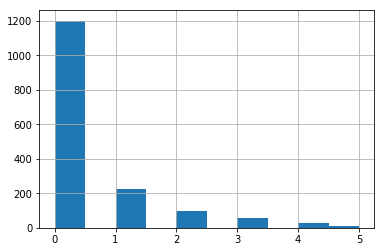

In [112]:
df['rez_esc'].hist()

In [113]:
df[['rez_esc','v2a1']].corr()

,rez_esc,v2a1
rez_esc,1.000000,-0.088257
v2a1,-0.088257,1.000000


In [114]:
df[['Target','rez_esc']].corr()

,Target,rez_esc
Target,1.000000,-0.101307
rez_esc,-0.101307,1.000000


In [115]:
df[['Target','rez_esc']].fillna(0).corr()

,Target,rez_esc
Target,1.000000,-0.093389
rez_esc,-0.093389,1.000000


In [116]:
df[['v2a1','Target']].corr()

,v2a1,Target
v2a1,1.000000,0.290887
Target,0.290887,1.000000


In [117]:
df[['v2a1','Target']].fillna(0).corr()

,v2a1,Target
v2a1,1.00000,0.17224
Target,0.17224,1.00000


In [118]:
df['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

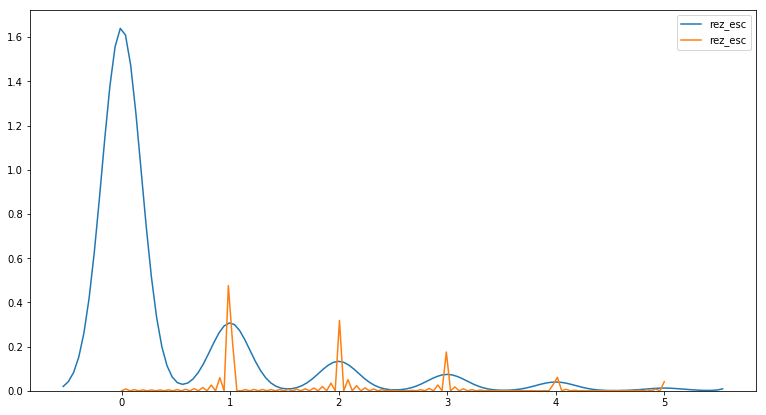

In [119]:
plt.figure(figsize=(13,7))
sns.kdeplot(df['rez_esc'])
sns.kdeplot(df['rez_esc'].fillna(0))

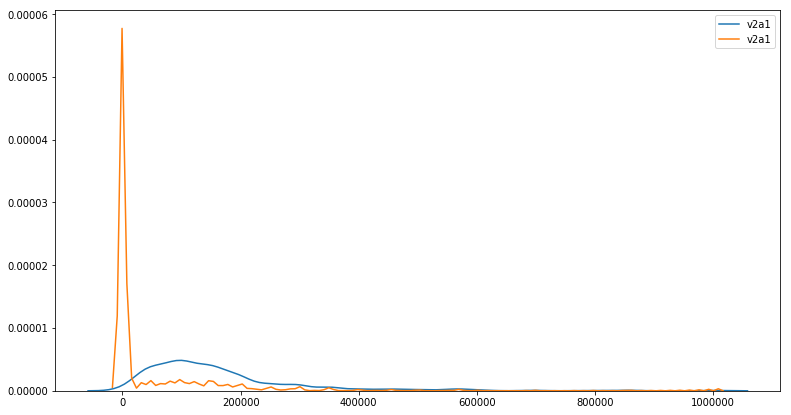

In [120]:
plt.figure(figsize=(13,7))
sns.kdeplot(df['v2a1'])
sns.kdeplot(df['v2a1'].fillna(0))

<Figure size 1656x1224 with 0 Axes>

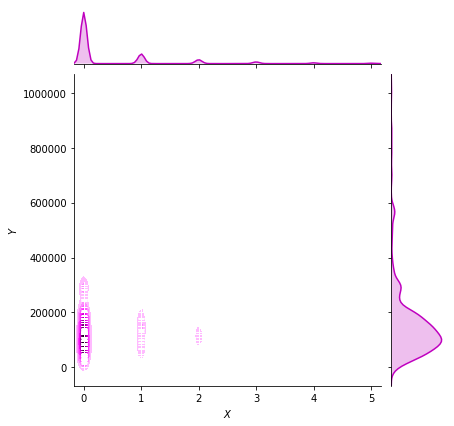

In [121]:
x, y = df['rez_esc'], df['v2a1']
plt.figure(figsize=(23,17))
g = sns.jointplot(x, y, data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

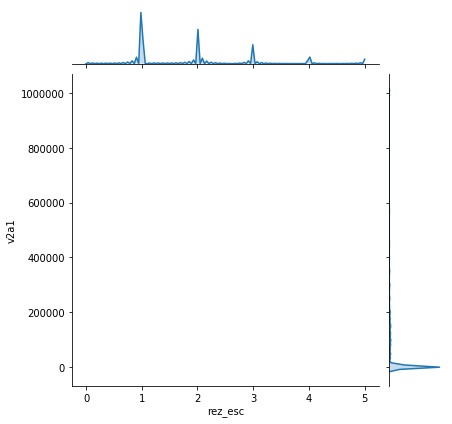

In [122]:
x, y = df['rez_esc'].fillna(0), df['v2a1'].fillna(0)
sns.jointplot(x, y, data=df, kind="kde")

How can we fill missing values for Income and Years behind?

Ignoring 'rez_esc' as there's very low correlation with Target, wheras filling with 0 for Income reduces the correlation by more than 0.1.

In [123]:
df['rez_esc'].fillna(0, inplace=True)

In [124]:
ff = pd.DataFrame(df.isnull().sum())
ff.loc[(ff.loc[:, ff.dtypes != object] != 0).any(1)]

,0
v2a1,6843


<Figure size 1656x1224 with 0 Axes>

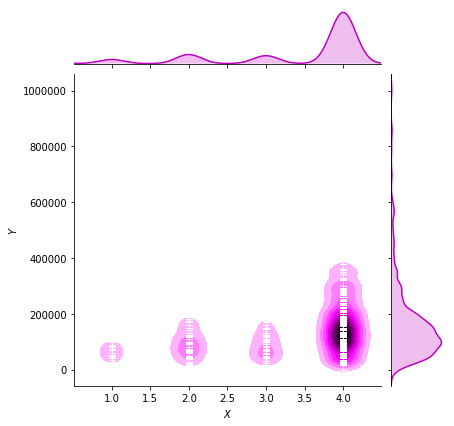

In [125]:
x, y = df['Target'], df['v2a1']
plt.figure(figsize=(23,17))
g = sns.jointplot(x, y, data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

<Figure size 1656x1224 with 0 Axes>

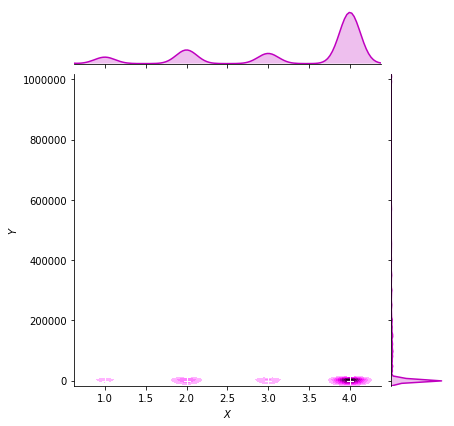

In [126]:
x, y = df['Target'], df['v2a1'].fillna(0)
plt.figure(figsize=(23,17))
g = sns.jointplot(x, y, data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

In [127]:
for i in range(1,5):
    print("Target", i, len(df['Target'].loc[df.Target == i]))

df['Target'].unique()

Target 1 755
Target 2 1597
Target 3 1189
Target 4 5991


array([4, 2, 3, 1])

In [128]:
df.groupby('Target').count()['v2a1']

Target
1     153
2     337
3     294
4    1905
Name: v2a1, dtype: int64

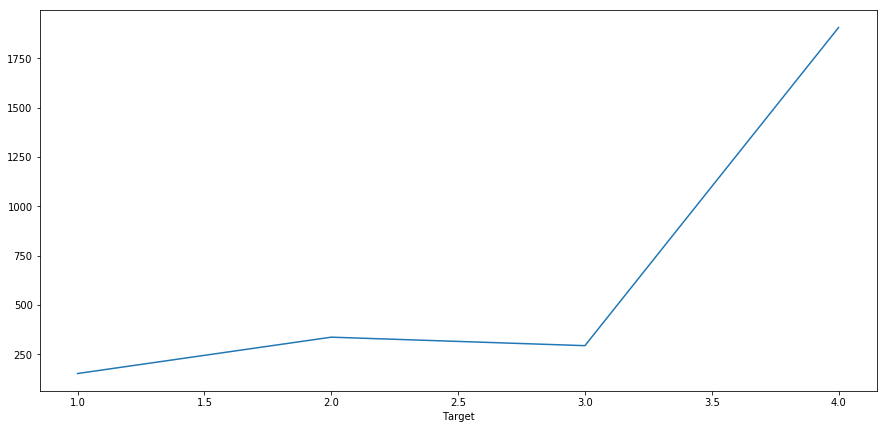

In [129]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Target').count()['v2a1'].plot(ax=ax)

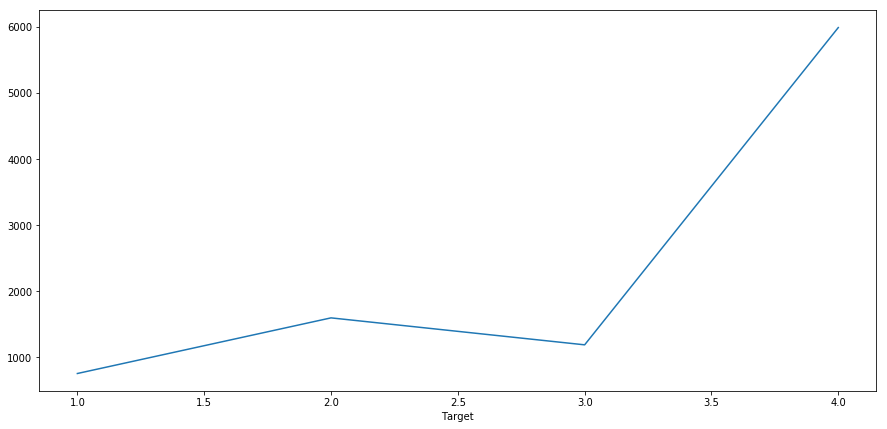

In [130]:
fig, ax = plt.subplots(figsize=(15,7))
df.fillna(0).groupby('Target').count()['v2a1'].plot(ax=ax)

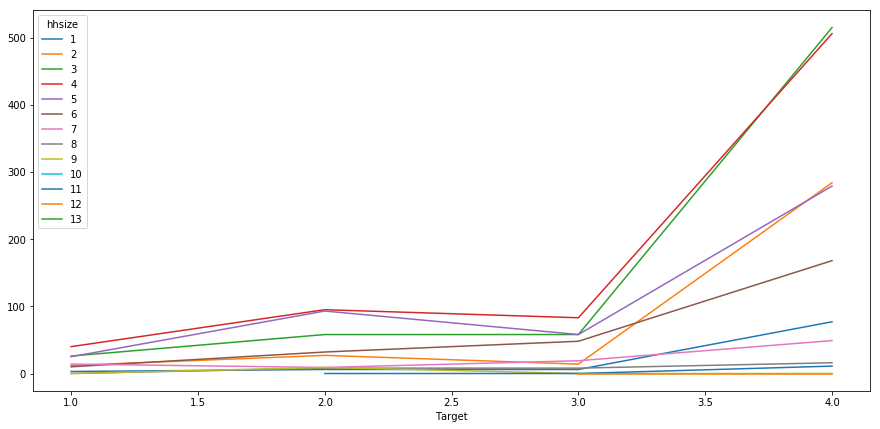

In [131]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Target','hhsize']).count()['v2a1'].unstack().plot(ax=ax)

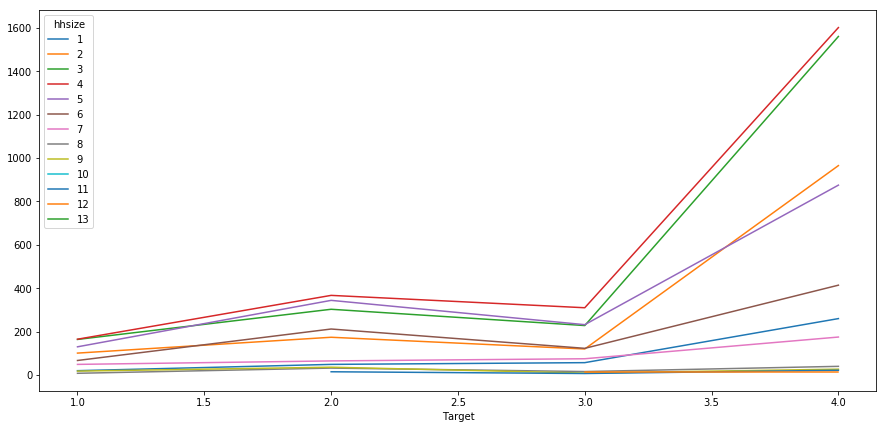

In [132]:
fig, ax = plt.subplots(figsize=(15,7))
df.fillna(0).groupby(['Target','hhsize']).count()['v2a1'].unstack().plot(ax=ax)

In [133]:
df['hhsize'].value_counts()

4     2443
3     2255
5     1581
2     1360
6      816
1      386
7      364
8       96
9       90
10      60
11      44
12      24
13      13
Name: hhsize, dtype: int64

In [134]:
df['hogar_total'].value_counts()

4     2443
3     2255
5     1581
2     1360
6      816
1      386
7      364
8       96
9       90
10      60
11      44
12      24
13      13
Name: hogar_total, dtype: int64

In [135]:
# use hhsize, ignore 'hogar_total',
total_features.remove('hogar_total')

len(total_features)

133

In [136]:
df[['hhsize','hogar_adul']].corr()

,hhsize,hogar_adul
hhsize,1.000000,0.638132
hogar_adul,0.638132,1.000000


In [137]:
df[['hhsize','Target']].corr()

,hhsize,Target
hhsize,1.000000,-0.147377
Target,-0.147377,1.000000


In [138]:
df[['Target','hogar_adul']].corr()

,Target,hogar_adul
Target,1.000000,0.159923
hogar_adul,0.159923,1.000000


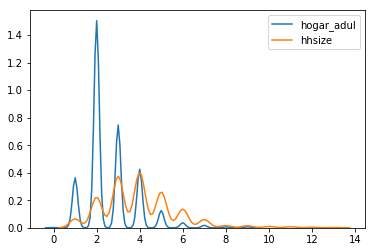

In [139]:
sns.kdeplot(df['hogar_adul'])
sns.kdeplot(df['hhsize'])


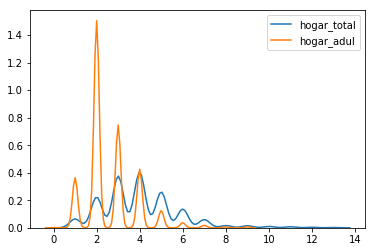

In [140]:
sns.kdeplot(df['hogar_total'])
sns.kdeplot(df['hogar_adul'])

In [141]:
max(df['hogar_adul']), max(df['hogar_total'])

(9, 13)

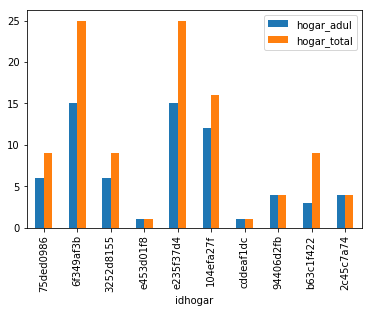

In [142]:
df.groupby('idhogar').sum()[['hogar_adul','hogar_total']].sample(10).plot.bar()

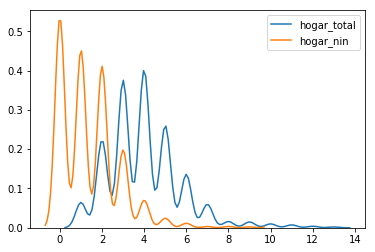

In [143]:
sns.kdeplot(df['hogar_total'])
sns.kdeplot(df['hogar_nin'])

In [144]:
df['male'].value_counts()

0    4924
1    4608
Name: male, dtype: int64

In [145]:
df['female'].value_counts()

1    4924
0    4608
Name: female, dtype: int64

we need only one column among male and female as both represent the same data!

In [146]:
# removing female
total_features.remove('female')

len(total_features)

132

r4t3, Total persons in the household

tamhog, size of the household

tamviv, number of persons living in the household


In [147]:
df['r4t3'].value_counts()

4     2439
3     2257
5     1587
2     1355
6      821
1      378
7      368
8       96
9       90
10      60
11      44
12      24
13      13
Name: r4t3, dtype: int64

In [148]:
df['tamhog'].value_counts()

4     2443
3     2255
5     1581
2     1360
6      816
1      386
7      364
8       96
9       90
10      60
11      44
12      24
13      13
Name: tamhog, dtype: int64

In [149]:
df['tamviv'].value_counts()

4     2392
3     2203
5     1616
2     1320
6      865
7      384
1      355
8      111
9       98
10      70
11      55
13      30
12      24
15       9
Name: tamviv, dtype: int64

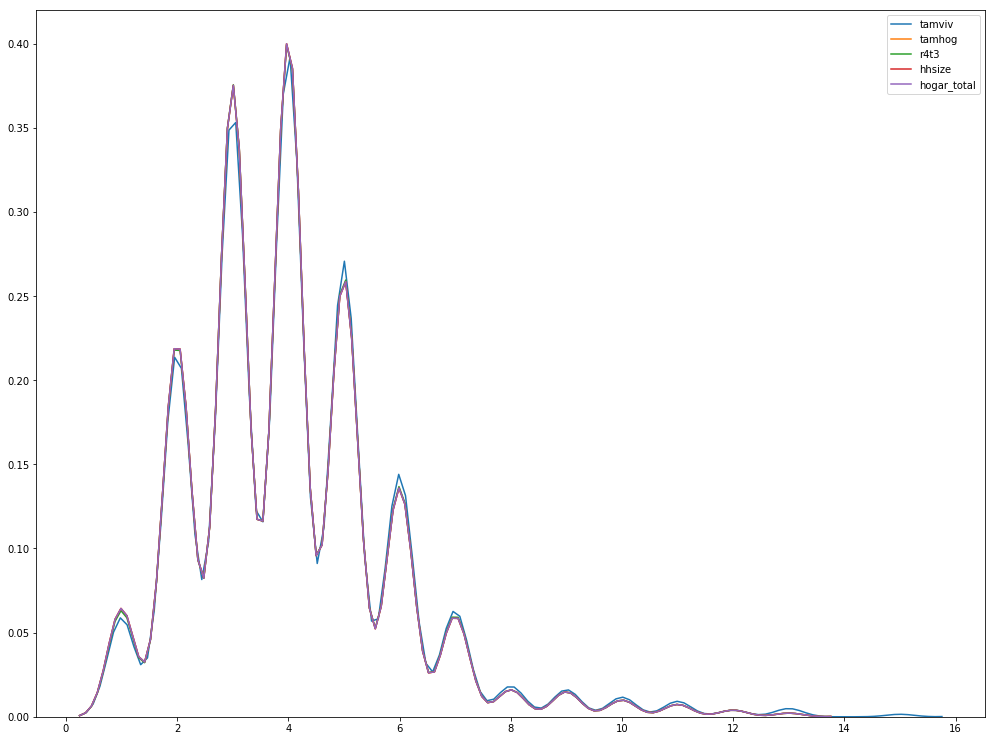

In [150]:
plt.figure(figsize=(17,13))
sns.kdeplot(df['tamviv'])
sns.kdeplot(df['tamhog'])
sns.kdeplot(df['r4t3'])
sns.kdeplot(df['hhsize'])
sns.kdeplot(df['hogar_total'])
#sns.kdeplot(df['hogar_adul'])


In [151]:
# removing 'r4t3', as 'hhsize' is of almost same distribution
total_features.remove('r4t3')

In [152]:
len(total_features)

131

In [153]:
'Target' in total_features

False

> F1-Score

In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 



### Model

In [154]:
X, y = df[total_features], df['Target']

In [155]:
# load xgboost, test train split
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [156]:
#Split the dataset into train and Test
seed = 7
test_size = 0.3
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [157]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_trian, y_train)
train_model2 = model2.fit(X_trian, y_train)

In [158]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)

print('Model 1 XGboost Report %r' % (classification_report(y_test, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           1       0.74      0.35      0.48       215\n           2       0.52      0.48      0.50       472\n           3       0.88      0.14      0.25       350\n           4       0.77      0.95      0.85      1823\n\n   micro avg       0.73      0.73      0.73      2860\n   macro avg       0.73      0.48      0.52      2860\nweighted avg       0.74      0.73      0.69      2860\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           1       0.94      0.78      0.85       215\n           2       0.87      0.79      0.83       472\n           3       0.92      0.67      0.77       350\n           4       0.90      0.99      0.94      1823\n\n   micro avg       0.90      0.90      0.90      2860\n   macro avg       0.91      0.80      0.85      2860\nweighted avg       0.90      0.90      0.89      2860\n'


### Model 2 has a precision, recall and f1-score of around 0.9!!

In [159]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))

Accuracy for model 1: 73.11
Accuracy for model 2: 89.90


### Model 2 has an accuracy of 89.9!!

## Hyperparameter Tunning of XGboost

### to be continued...

In [160]:
df_test = pd.read_csv('../input/test.csv')

In [161]:
len(df_test)

23856

In [162]:
df_test.sample(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
7069,ID_b116988d2,200000.0,0,6,0,1,1,1,1.0,0,2,2,0,2,2,0,4,4,4,4,15,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10d5c59cd,2,2,0,4,yes,14,no,14.500000,0,0,0,0,0,0,0,1,0,4,1.000000,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,34,225,1156,16,196,4,1.000000,1.000000,210.250000,1156
9489,ID_5a9907306,NaN,0,3,0,1,1,1,1.0,1,0,1,0,1,1,1,1,2,2,2,3,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,98e5c2e8d,1,1,0,2,yes,no,8,8.000000,0,1,0,0,0,0,0,0,0,1,2.000000,0,0,0,0,1,0,0,1,2,1,0,0,0,0,0,1,0,10,9,100,4,0,1,4.000000,1.000000,64.000000,100
14038,ID_8c31e2612,NaN,0,4,0,1,1,0,NaN,0,0,0,0,2,2,0,2,2,2,2,3,NaN,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4b0793010,0,2,1,2,yes,no,3,2.000000,0,1,0,0,0,0,0,0,0,2,1.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,65,9,4225,4,0,0,1.000000,1.000000,4.000000,4225
7351,ID_42b57c847,NaN,0,5,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,9,NaN,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,511b452f3,2,2,0,4,yes,6,no,7.500000,0,0,0,1,0,0,0,0,0,3,1.333333,1,0,0,0,0,0,0,1,4,1,0,0,0,0,0,1,0,37,81,1369,16,36,4,1.777778,1.000000,56.250000,1369
15708,ID_8c121a893,NaN,0,4,0,1,1,0,NaN,0,1,1,0,2,2,0,3,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7eaf9b79e,0,3,0,3,no,no,no,1.333333,1,0,0,0,0,0,0,0,0,2,1.500000,1,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,1,58,0,3364,9,0,0,2.250000,0.000000,1.777778,3364
16548,ID_b6ec2a1ed,NaN,0,4,0,1,1,1,1.0,0,2,2,0,2,2,0,4,4,4,4,15,NaN,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,9176c0da4,0,4,1,4,.33333334,2,no,10.750000,0,0,0,0,0,0,0,1,0,2,2.000000,1,0,0,0,0,1,0,1,4,0,0,1,0,0,0,1,0,35,225,1225,16,4,0,4.000000,0.111111,115.562500,1225
22113,ID_02b859657,NaN,0,4,0,1,1,0,NaN,0,2,2,0,1,1,0,3,3,3,3,6,NaN,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,6bc4fbbdd,2,1,0,3,2,6,no,6.000000,0,0,1,0,0,0,0,0,0,3,1.000000,1,0,0,0,0,0,0,1,3,0,0,0,0,0,1,1,0,45,36,2025,9,36,4,1.000000,4.000000,36.000000,2025
17010,ID_3380f7805,NaN,0,3,0,1,1,0,NaN,2,2,4,0,2,2,2,4,6,6,6,3,NaN,6,0,0,0,0,1,0,0

In [178]:
# considering only head of household
df_test = df_test.loc[df_test.parentesco1 == 1]
len(df_test)

7334

In [170]:
X_actual_test = df_test[total_features]

In [171]:
X_actual_test.shape

(7334, 131)

In [173]:
pred_actual = train_model2.predict(X_actual_test)
pred_actual

array([4, 4, 4, ..., 4, 2, 2])

In [177]:
pred_actual.shape

(7334,)

In [184]:
df_final = pd.DataFrame(df['Id'], pred_actual).reset_index()
df_final.columns = ['Target','Id']


,Target,Id
7168,2,ID_68de51c94
6125,2,ID_68de51c94
6948,4,ID_d56d6f5f5
6823,4,ID_d56d6f5f5
788,4,ID_d56d6f5f5


In [190]:
cols = df_final.columns.tolist()
cols

['Target', 'Id']

In [191]:
cols = cols[-1:] + cols[:-1]
cols

['Id', 'Target']

In [193]:
df_final = df_final[cols]
df_final.head(7)

,Id,Target
0,ID_d56d6f5f5,4
1,ID_d56d6f5f5,4
2,ID_d56d6f5f5,4
3,ID_d56d6f5f5,4
4,ID_d56d6f5f5,4
5,ID_d56d6f5f5,4
6,ID_d56d6f5f5,4


In [194]:
df_final['Target'].value_counts()

4    5841
2     936
3     349
1     208
Name: Target, dtype: int64

In [187]:
df_final.to_csv('sample_submission.csv')

In [188]:
os.listdir('../input/')

['train.csv', 'sample_submission.csv', 'test.csv']